# Monte Carlo Methods
Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.

In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt 

## Simulating Dart Throws
By throwing darts into a _length_ 2 square with a _radius_ 1 circle inside it,
the probability of a point landing inside the circle is proportional to its area.

In this case:

P(point being in the circle) = $\frac{\pi}{r^2}$ / $l^2$ = $\frac{\pi}{4}$

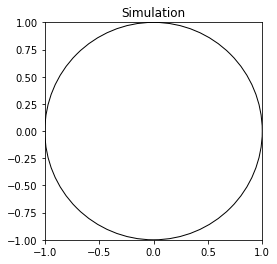

In [2]:
fig, axes = plt.subplots()
c = plt.Circle((0, 0), 1, fill=False)
axes.set_xlim([-1, 1]) ; axes.set_ylim([-1, 1])
axes.set_aspect(1)
axes.add_artist(c)
plt.title('Simulation')
plt.show()

## Simple Routine



In [3]:
N, circ = 2000, 0

# for plotting
in_points = []
out_points = []

for i in range(N):
  x = 2 * np.random.uniform() - 1
  y = 2 * np.random.uniform() - 1
  if x ** 2 + y ** 2 <= 1:
    circ += 1
    in_points.append([x,y])
  else:
    out_points.append([x,y])

print(f"Estimate: {circ / N:.5f}")
print(f"Truth: {pi / 4:.5f}")
print(f"Error: {abs((pi / 4) - (circ / N)):.5f}")

Estimate: 0.79100
Truth: 0.78540
Error: 0.00560


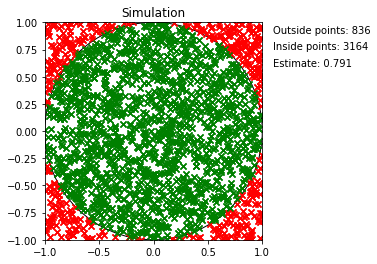

In [4]:
in_points = np.array(in_points)
out_points = np.array(out_points)

fig, axes = plt.subplots()
c = plt.Circle((0, 0), 1, fill=False)
axes.set_xlim([-1, 1]) ; axes.set_ylim([-1, 1])
axes.set_aspect(1)
axes.add_artist(c)

o = plt.scatter(out_points[:, 0], out_points[:, 1], color='r', marker='x')
axes.add_artist(o)

i = plt.scatter(in_points[:, 0], in_points[:, 1], color='g', marker='x')
axes.add_artist(i)

plt.text(1.1, 0.90, f"Outside points: {out_points.size}")
plt.text(1.1, 0.75, f"Inside points: {in_points.size}")
plt.text(1.1, 0.60, f"Estimate: {in_points.size / (out_points.size + in_points.size)}")

plt.title('Simulation')
plt.show()

## Harder Example

Playing a game where P(win) = p. Game ends after two consecutive losses. What's the expected number of rounds, E(r)?

The solution, E(r) = $\frac{2-p}{(1-p)^2}$, might not be trivial.

We can simulate it with a Monte Carlo Method.

In [5]:
rounds = []
N, p = 1000000, 1/2

for i in range(N):
  r, losses = 0, 0
  while losses < 2:
    r += 1
    x = np.random.uniform()
    if x < p:
      losses = 0
    else:
      losses += 1
  rounds.append(r)

print(f"Estimate: {np.mean(rounds):.5f}")
print(f"Truth: {(2 - p) / ((1 - p) ** 2):.5f}")

Estimate: 5.98937
Truth: 6.00000


As the probability of winning rises, the expected number of rounds increases to infinity. This simulation would take a considerable amount of time.

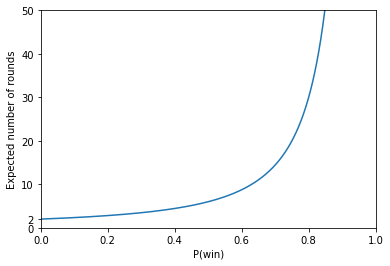

In [6]:
plt.figure()

p = np.linspace(0, 1, 1000, False)
e = (2 - p) / ((1 - p) ** 2)

plt.ylim([0, 50]) ; plt.xlim([0, 1])

plt.yticks(list(plt.yticks()[0]) + [2])

plt.xlabel('P(win)') ; plt.ylabel('Expected number of rounds')

plt.plot(p, e)
plt.show()